In [558]:
import pandas as pd
import numpy as np
from sklearn.metrics import plot_confusion_matrix


In [559]:
# read data
# import pandas as pd
df = pd.read_csv("./first.csv")
# pivot dataframe
df = pd.pivot_table(df, index=["cell_line", "treatment", "time"], columns=["reporter"], values="value")
# df[df.index == "184A1"]
df = df.reset_index()
df.set_index("cell_line")


# display(df.filter(regex="184A1", axis=0))
# display(df[df.cell_line== "184A1"])
# filter data and clean to prepare it for Support Vector Machine
df_copy = df
new_df = df[df["treatment"] == "full"]
types_df = pd.read_csv("subtypes.csv")
full_dataframe = new_df.set_index("cell_line").join(types_df.set_index("Cell line"))

luminal_cells = full_dataframe[full_dataframe["Type"] == "L"].fillna(0)
basal_cells = full_dataframe[full_dataframe["Type"] == "B"].fillna(0)
normal_cells = full_dataframe[full_dataframe["Type"] == "Normal"].fillna(0)
luminal_cell_names = luminal_cells.index
basal_cell_names = basal_cells.index
normal_cell_names = normal_cells.index
luminal_copy = luminal_cells
basal_copy = basal_cells
normal_copy = normal_cells
display(full_dataframe)
# set up data for training
drop_lst = ["treatment", "time", "cell_line", "Type", "ER", "PR", "HER2", "PI3K", "p53", "RAS"]
luminal_cells = luminal_cells.reset_index().drop(drop_lst, axis=1)
basal_cells = basal_cells.reset_index().drop(drop_lst,axis=1)
normal_cells = normal_cells.reset_index().drop(drop_lst, axis=1)

svm_data_bin = pd.concat([luminal_cells, basal_cells])

svm_data_bin = svm_data_bin.reset_index()
svm_data_bin = svm_data_bin.fillna(0)
svm_data_bin = svm_data_bin.drop("index", axis=1)

svm_labels_bin = list(np.zeros(len(luminal_cells))) + list(np.ones(len(basal_cells)))

luminal_centroid = luminal_cells.transpose().mean(axis=1)
basal_centroid = basal_cells.transpose().mean(axis=1)
normal_centroid = normal_cells.transpose().mean(axis=1)

all_labels = list(types_df["Cell line"])

full_sample_names = list(df[df["treatment"] == "full"]["cell_line"])

perturbs = df.treatment.unique()
df

,treatment,time,CyclinB,GAPDH,IdU,Ki.67,b.CATENIN,cleavedCas,p.4EBP1,p.AKT.Thr308.,...,p.p38,p.p53,p.p90RSK,Type,ER,PR,HER2,PI3K,p53,RAS
cell_line,,,,,,,,,,,,,,,,,,,,,
184A1,full,0.0,3.269844,2.971663,6.726300,3.876879,1.268450,3.011949,2.905013,2.638730,...,2.187180,1.630915,3.156479,Normal,NaN,NaN,NaN,NaN,NaN,NaN
184B5,full,0.0,1.992426,2.214774,6.145829,2.379644,0.644142,2.724148,2.210643,2.273421,...,2.324038,1.629922,2.703306,Normal,NaN,NaN,NaN,NaN,NaN,NaN
AU565,full,0.0,1.673790,1.759997,6.159892,3.368162,0.677910,1.779176,2.533022,2.116985,...,1.740349,3.613720,4.152506,L,NaN,NaN,NaN,NaN,TP53_R175H,NaN
BT20,full,0.0,2.604696,2.357667,6.357916,3.449260,0.981176,2.298729,2.922381,2.584877,...,3.103188,2.332574,3.965937,B,neg,neg,neg,PIK3CA_P539R,TP53_K132Q,?
BT474,full,0.0,1.759334,3.102078,6.121343,2.168054,1.063666,2.434756,2.905236,2.802465,...,1.724056,1.890721,2.842842,L,pos,pos,pos,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UACC812,full,0.0,1.910090,2.156748,6.249708,2.524488,0.447033,1.912245,1.937317,1.882454,...,2.260456,1.723039,3.485025,L,pos,pos/neg,pos,NaN,NaN,NaN
UACC893,full,0.0,2.283681,2.579910,6.439663,3.187646,0.796624,1.779636,3.442570,2.101953,...,1.029188,2.169729,1.961478,L,neg,neg,pos,NaN,NaN,NaN
ZR751,full,0.0,2.320011,2.379614,6.058985,3.423700,0.521518,1.595210,2.676131,2.019493,...,1.741306,1.993960,3.357701,L,pos,pos/neg,neg,NaN,NaN,NaN


reporter,cell_line,treatment,time,CyclinB,GAPDH,IdU,Ki.67,b.CATENIN,cleavedCas,p.4EBP1,...,p.S6,p.S6K,p.SMAD23,p.SRC,p.STAT1,p.STAT3,p.STAT5,p.p38,p.p53,p.p90RSK
0,184A1,EGF,0.0,1.693038,2.768195,5.048951,1.978325,1.242677,2.522134,1.848613,...,4.535059,2.005021,2.275624,1.926817,2.256196,1.898556,1.757215,1.952775,1.439909,2.643719
1,184A1,EGF,5.5,1.660883,3.063371,5.024605,2.065876,1.071111,2.525901,1.638560,...,4.656043,2.301348,2.173578,1.798355,2.279188,2.345774,2.189004,2.213188,1.415826,2.972972
2,184A1,EGF,7.0,1.693291,3.143739,5.004796,2.148887,1.121240,2.603469,1.669925,...,4.787607,2.364732,2.230305,1.804816,2.317053,2.616184,2.316363,2.344061,1.450442,3.098529
3,184A1,EGF,9.0,1.848270,3.356148,4.966733,2.270448,1.304267,2.808688,1.882485,...,4.696978,2.497817,2.457616,1.912574,2.436406,2.977463,2.460209,2.585584,1.572184,3.353765
4,184A1,EGF,13.0,1.755241,3.219771,4.982155,2.130930,1.218953,2.642353,1.695485,...,4.906663,2.434111,2.329397,1.910402,2.441506,2.821463,2.504858,2.618511,1.504860,3.182376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3077,ZR75B,imTOR,9.0,1.968278,2.698291,5.573131,2.535480,0.708373,1.967491,3.039028,...,5.210049,2.224620,1.651534,2.664074,2.914947,2.009012,2.635083,3.169066,2.964758,4.085812
3078,ZR75B,imTOR,13.0,1.830282,2.629350,5.508754,2.491333,0.671327,1.823448,2.799667,...,5.574983,2.107620,1.502499,2.593243,2.900344,1.914773,2.598211,3.088416,2.844595,3.774709
3079,ZR75B,imTOR,17.0,1.852685,2.669336,5.519410,2.523683,0.697228,1.846894,2.842264,...,5.592048,2.131127,1.537944,2.624527,2.966030,1.956715,2.629490,3.099447,2.878503,3.664475
3080,ZR75B,imTOR,40.0,1.963932,2.662351,5.497567,2.593451,0.783285,2.036658,3.151730,...,4.823589,2.162445,1.716881,2.716742,3.076338,2.056396,2.650604,2.969276,2.994993,3.314527


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



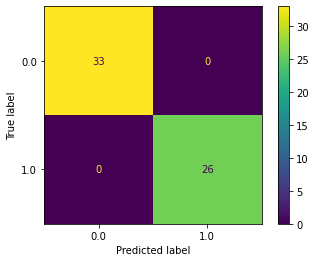

In [560]:
# train Support Vector Machine
from sklearn import svm
from sklearn.svm import SVC
svc = SVC(kernel="linear", C=100)
svc.fit(svm_data_bin, svm_labels_bin)
plot_confusion_matrix(svc,svm_data_bin,svm_labels_bin)

In [561]:
# Calculate State Transition Vector and Normal to Hyperplane
from scipy import linalg
from math import degrees
hyperplane_normal_lb = svc.coef_[0]/linalg.norm(svc.coef_[0])
print(svc.coef_[0])

# distance between luminal and basal centroids (cSTAR eq. 1) -> STV
state_vec_lb = (basal_centroid - luminal_centroid)/linalg.norm(luminal_centroid - basal_centroid)
norm_stv_df = pd.DataFrame(state_vec_lb,index=svm_data_bin.columns,columns=['STV_LB'])
norm_stv_df.insert(0,'Norm_LB', hyperplane_normal_lb)
# norm_stv_df.sort_values(by='STV_LB').to_csv('STV_Luminal_Basal.csv')
norm_stv_df.sort_values(by='STV_LB', ascending=False).to_csv('STV_Luminal_Basal.csv')

[ 0.64093899  0.31289727  0.76672597  1.14990881  0.31833833 -0.06232187
  0.09926729  0.81840309 -0.62203719  0.31708758 -1.83277731  1.11380864
  0.14480785  0.77461403 -0.82326788  0.10702848  0.2813898   0.60758788
 -1.42783713 -0.81010976 -1.01324229  0.81400213  0.95395103  0.50943239
 -0.47626979  0.20172815 -0.7358234   0.38077146 -0.4508033   2.06180854
 -0.22279433  0.72857298  1.56575659 -0.61566815  0.33257504 -0.21563109
 -0.5942577 ]


In [562]:
df = df.reset_index()
df["cell_line"] += "_" + df["time"].astype(str) + "_" + df["treatment"]
df = df.set_index("cell_line")
df = df.fillna(0)
types_df = types_df.set_index("Cell line")
types_df

,Type,ER,PR,HER2,PI3K,p53,RAS
Cell line,,,,,,,
184A1,Normal,NaN,NaN,NaN,NaN,NaN,NaN
184B5,Normal,NaN,NaN,NaN,NaN,NaN,NaN
AU565,L,NaN,NaN,NaN,NaN,TP53_R175H,NaN
BT20,B,neg,neg,neg,PIK3CA_P539R,TP53_K132Q,?
BT474,L,pos,pos,pos,NaN,NaN,NaN
...,...,...,...,...,...,...,...
UACC812,L,pos,pos/neg,pos,NaN,NaN,NaN
UACC893,L,neg,neg,pos,NaN,NaN,NaN
ZR751,L,pos,pos/neg,neg,NaN,NaN,NaN


In [563]:
import statistics
# make intercept negative since we wish to get it on "the other side"
H_CONST_LB = - svc.intercept_[0]/linalg.norm(svc.coef_[0])
n = norm_stv_df['Norm_LB']
s = norm_stv_df["STV_LB"]

df = df.drop(["index", "treatment", "time"], axis=1)

def extract_cell_line(sample):
    return sample[:sample.index("_")]

def calculate_dpd(row,dataframe, h, s_vec, n_vec):
    smpl = row.name
    DPD_val = - (h - np.dot(dataframe.loc[smpl],n_vec))/np.dot(n_vec,s_vec)
    return DPD_val

/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



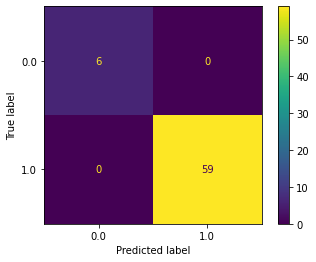

In [564]:
svc_canc = SVC(kernel='linear',C=100)
svc_canc.fit(pd.concat([luminal_cells,basal_cells,normal_cells]).fillna(0), list(np.ones(len(luminal_cells))) + list(np.ones(len(basal_cells))) + list(np.zeros(len(normal_cells))))
# b_coeff_canc = svc_canc.intercept_[0]/linalg.norm(svc_canc.coef_[0])
hyperplane_normal_canc = svc_canc.coef_[0]/linalg.norm(svc_canc.coef_[0])
canc_centroid = (basal_centroid + luminal_centroid)/2
state_vec_canc = pd.DataFrame((canc_centroid - normal_centroid)/linalg.norm(canc_centroid - normal_centroid), columns=["STV_Canc"])
plot_confusion_matrix(svc_canc,pd.concat([luminal_cells,basal_cells,normal_cells]).fillna(0), list(np.ones(len(luminal_cells))) + list(np.ones(len(basal_cells))) + list(np.zeros(len(normal_cells))))

In [565]:
composite_vec = pd.concat([norm_stv_df, state_vec_canc], axis=1)
composite_vec.insert(2, "Norm_Canc", hyperplane_normal_canc)
composite_vec

,Norm_LB,STV_LB,Norm_Canc,STV_Canc
CyclinB,0.128360,0.253347,-0.264082,-0.274499
GAPDH,0.062664,0.103890,0.157388,0.003229
IdU,0.153552,0.268956,0.026977,-0.109702
Ki.67,0.230292,0.338760,-0.079742,-0.173358
b.CATENIN,0.063753,0.006583,0.084062,-0.010996
cleavedCas,-0.012481,-0.001567,-0.333043,-0.365495
p.4EBP1,0.019880,-0.055862,0.069789,0.075876
p.AKT.Thr308.,0.163901,-0.011021,-0.111742,-0.088301
p.AMPK,-0.124575,0.156432,-0.008779,-0.124644
p.Akt.Ser473.,0.063503,0.222617,-0.154573,0.160958


In [566]:
H_CONST_CANC = - svc_canc.intercept_[0]/linalg.norm(svc_canc.coef_[0])
composite_dpd = pd.DataFrame(np.zeros((len(df.T.columns),2)),index=df.T.columns,columns=['DPD_Canc','DPD_LB'])
s_canc = composite_vec["STV_Canc"]
norm_canc = composite_vec["Norm_Canc"]
s_lb = composite_vec["STV_LB"]
norm_lb = composite_vec["Norm_LB"]
df_updated = df
# df_updated = df.drop(["Group", "Specific DPD"], axis=1)
# len(df_updated.columns)
composite_dpd["DPD_Canc"] = df_updated.apply(calculate_dpd, args=(df_updated, H_CONST_CANC, s_canc, norm_canc), axis=1)
composite_dpd["DPD_LB"] = df_updated.apply(calculate_dpd, args=(df_updated, H_CONST_LB, s_lb, norm_lb), axis=1)

composite_dpd_full = composite_dpd.filter(regex="_full", axis=0)
composite_dpd_full["real_col"] = composite_dpd_full.index.str[:-9]
composite_dpd_full = composite_dpd_full.set_index("real_col")
composite_dpd_full



/var/folders/x0/mtqbk1w92ps5s326vkbvv9n40000gn/T/ipykernel_45727/59467249.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,DPD_Canc,DPD_LB
real_col,,
184A1,-0.795902,0.653684
184B5,-0.796335,-0.603114
AU565,2.179512,-1.657717
BT20,1.959269,0.525111
BT474,1.276234,-0.801424
...,...,...
UACC812,1.486480,-0.980268
UACC893,3.137691,-1.950590
ZR751,2.654035,-0.405728


In [567]:
# from matplotlib import pyplot as plt
# fig = plt.figure(figsize=(9,7))
# ax = fig.add_subplot(111)

# fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 18} 
# fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
# fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
# fontLegend =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 14} 
# plt.rc('font', **fontAxes)

# ax.plot(composite_dpd_full.loc[luminal_copy.T.columns].iloc[:,0],composite_dpd_full.loc[luminal_copy.T.columns].iloc[:,1],'^',color='blue',label='luminal',ms=8)
# ax.plot(composite_dpd_full.loc[basal_copy.T.columns].iloc[:,0],composite_dpd_full.loc[basal_copy.T.columns].iloc[:,1],'^',color='red',label='basal',ms=8)
# ax.plot(composite_dpd_full.loc[normal_copy.T.columns].iloc[:,0],composite_dpd_full.loc[normal_copy.T.columns].iloc[:,1],'^',color='green',label='normal',ms=8)

# ax.set_xlabel('DPD_cancerous',**fontLabel)
# ax.set_ylabel('DPD_LB',**fontLabel)


# ax.legend(numpoints=1,prop=fontLegend,ncol=1)
# plt.show()

In [568]:
# # getting module outputs
# df_copy_og = pd.read_csv("median_phospho_data.csv")


# for line in df_copy_og.cell_line.unique():
#     if line != "MDAMB231":
#         continue
#     try:
#         print(f"{line}")
#         module_dict = {
#             "EGF" : [],
#             "iMEK" : [],
#             "iPKC" : [],
#             "iEGFR" : [],
#             "iPI3K" : []
#         }

#         df_copy = df_copy_og[df_copy_og["treatment"] != "full"]
#         df_copy = df_copy[df_copy["cell_line"] == line]

#         df_copy = df_copy.drop("cell_line",axis=1)

#         proteins = list(df_copy.columns)
#         proteins.remove("treatment")
#         proteins.remove("time")
#         proteins.remove("b.CATENIN")
#         p_dict = {i:module_dict for i in proteins}

        
#         for p in p_dict.keys():
            
#             vmax = 0
#             marker = ""
#             for module in module_dict.keys():
#                 if module == "iPI3K":
#                     continue
#                 # print(f"{module}: ")
#                 p_df = df_copy.T.loc[["time", "treatment", p], :]
#                 p_df = p_df.T[p_df.T["treatment"] == module]


#                 # a = p_df.loc[p_df.time==40.0, p].values[0]
#                 b = p_df.loc[p_df.time==60.0, p].values[0]
#                 # print(fold)
#                 module_dict[module].append({p : b})
#         # print(p_dict)



#         for p in module_dict.keys():
#             print(f"{p} module output is: ")
#             mn = 1
#             for m in module_dict[p]:
#                 mn = m[list(m.keys())[0]] if m[list(m.keys())[0]] < mn else mn

#             print(mn)

#             for m in module_dict[p]:
#                 if m[list(m.keys())[0]] == mn:
#                     print(m)
#     except:
#         print("error")
#         continue




In [569]:
# generate r_ij values for matrices

# modules_df = pd.read_excel("BMRA_modules.xlsx")
# modules_df = modules_df.set_index("Module_name").drop("EGF")
# # format outputs as are in dataframe
# outputs = modules_df.Output
# output_lst = [s.replace("-", ".") for s in list(outputs)]
# output_lst[-1] = "p.GSK3b"
# output_lst[1] = "p.Akt.Ser473."
# output_lst[2] = "p.ERK"
# print(output_lst)
# print(modules_df.index)

module_dict = {
    "EGFR" : "p.HER2",
    "MEK" : "p.ERK",
    "PI3K" : "p.Akt.Ser473.",
    "PKC" : "p.GSK3b",
    "mTOR" : "p.S6",
    "STAT3" : "p.STAT3",
    "TGFb_SMAD" : "p.SMAD23",
}

modules_df = pd.DataFrame.from_dict(module_dict,orient="index")
modules_df.columns = ["Output"]
modules_df.reset_index()
modules_df.index.name = "module"
modules_df["Perturbation"] = ["iEGFR", "iMEK","iPI3K", "iPKC", "imTOR","null","null"]
modules_df
output_lst = list(modules_df.Output)


In [570]:
# md7_df = df_copy_og[df_copy_og.cell_line == "MDAMB157"]
# md7_df = md7_df[md7_df.time == 60.0]
# display(md7_df)



# arr = []
# for p_ in md7_df:
#     if p_ in ["cell_line", "treatment", "time"]:
#         continue
#     arr.append(list(md7_df[p_])[0])
#     # print(p_, arr[-1])
# # md7_df.columns
# min(arr)

# # md7_df = md7_df[md7_df.treatment == "EGF"]
# # md7_df["IdU"]
# md7_df.to_csv("test.csv")

In [571]:
mod_df = df_copy[df_copy.treatment == "full"]
mod_df = mod_df.drop(output_lst, axis=1)
mod_df = mod_df.drop(["p.MEK","p.AKT.Thr308."], axis=1)
# mod_df.columns

In [572]:
luminal_mod = mod_df.loc[mod_df["cell_line"].isin(luminal_cell_names)]
basal_mod = mod_df.loc[mod_df["cell_line"].isin(basal_cell_names)]
normal_mod = mod_df.loc[mod_df["cell_line"].isin(normal_cell_names)]

mod_drop_lst = ["treatment", "time", "cell_line", "index"]
luminal_mod = luminal_mod.reset_index().drop(mod_drop_lst, axis=1)
basal_mod = basal_mod.reset_index().drop(mod_drop_lst,axis=1)
normal_mod = normal_mod.reset_index().drop(mod_drop_lst, axis=1)

lb_data_mod = pd.concat([luminal_mod, basal_mod])

lb_data_mod = lb_data_mod.reset_index().fillna(0)
lb_data_mod = lb_data_mod.drop("index", axis=1)

lb_labels_mod = list(np.zeros(len(luminal_mod))) + list(np.ones(len(basal_mod)))

canc_data_mod = pd.concat([lb_data_mod, normal_mod]).fillna(0)
canc_labels_mod = list(np.zeros(len(luminal_mod) + len(basal_mod))) + list(np.ones(len(normal_mod)))

luminal_centroid_mod = luminal_mod.transpose().mean(axis=1)
basal_centroid_mod = basal_mod.transpose().mean(axis=1)
normal_centroid_mod = normal_mod.transpose().mean(axis=1)

/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



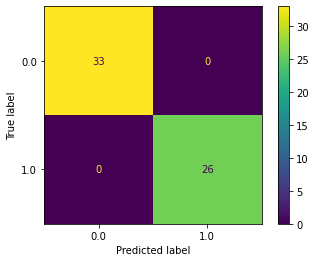

In [573]:
# Luminal vs Basal Separation
svc_mod = SVC(kernel="linear", C=100)
svc_mod.fit(lb_data_mod, lb_labels_mod)
plot_confusion_matrix(svc_mod, lb_data_mod, lb_labels_mod)

In [574]:
H_LB_MOD = - svc_mod.intercept_[0]/linalg.norm(svc_mod.coef_[0])
hyperplane_normal_lb_mod = svc_mod.coef_[0]/linalg.norm(svc_mod.coef_[0])
state_vec_lb_mod = (basal_centroid_mod - luminal_centroid_mod)/linalg.norm(luminal_centroid_mod - basal_centroid_mod)

angle_train = degrees(np.arccos(np.dot(hyperplane_normal_lb_mod,state_vec_lb_mod)))
print(angle_train)

norm_stv_df_mod = pd.DataFrame(state_vec_lb_mod,index=lb_data_mod.columns,columns=['STV_LB_mod'])
norm_stv_df_mod.insert(0,'Norm_LB_mod', hyperplane_normal_lb_mod)

norm_stv_df_mod.sort_values(by='Norm_LB_mod').to_csv('STV_Luminal_Basal_mod.csv')

display(norm_stv_df_mod.sort_values(by='Norm_LB_mod'))
np.dot(norm_stv_df_mod['Norm_LB_mod'],norm_stv_df_mod['STV_LB_mod'])

65.9981722635837


,Norm_LB_mod,STV_LB_mod
reporter,,
p.MAP2K3,-0.416552,0.037335
p.MAPKAPK2,-0.389667,0.034673
p.BTK,-0.385700,-0.020404
p.H3,-0.106791,-0.054086
p.PDPK1,-0.103296,0.021462
p.S6K,-0.093778,0.040515
p.RB,-0.084987,-0.294803
GAPDH,-0.077131,0.123728
IdU,-0.076484,0.320314


0.40676578498568317

/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



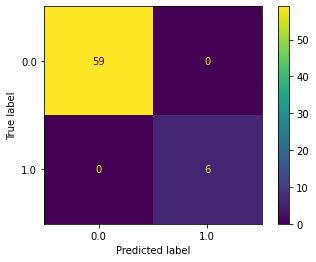

In [575]:
# Cancer vs Non-cancer
svc_canc_mod = SVC(kernel="linear", C=100)
svc_canc_mod.fit(canc_data_mod, canc_labels_mod)
plot_confusion_matrix(svc_canc_mod, canc_data_mod, canc_labels_mod)

canc_centroid_mod = (basal_centroid_mod + luminal_centroid_mod)/2.0

H_CANC_MOD = - svc_canc_mod.intercept_[0]/linalg.norm(svc_canc_mod.coef_[0])
hyperplane_normal_canc_mod = svc_canc_mod.coef_[0]/linalg.norm(svc_canc_mod.coef_[0])
state_vec_canc_mod = (canc_centroid_mod - normal_centroid_mod)/linalg.norm(canc_centroid_mod - normal_centroid_mod)


In [576]:
composite_vec_mod = pd.DataFrame(np.array([hyperplane_normal_canc_mod , np.array(state_vec_canc_mod),hyperplane_normal_lb_mod,np.array(state_vec_lb_mod)]),columns=luminal_mod.T.index,index=['Norm_Canc_mod','Canc_STV_mod','Norm_LB_mod','LB_STV_mod']).T
composite_vec_mod.to_csv('STV_2D_mod.csv')
composite_vec_mod

,Norm_Canc_mod,Canc_STV_mod,Norm_LB_mod,LB_STV_mod
reporter,,,,
CyclinB,0.162041,-0.309948,0.219055,0.301726
GAPDH,-0.296244,0.003646,-0.077131,0.123728
IdU,0.001358,-0.123869,-0.076484,0.320314
Ki.67,0.027528,-0.195746,0.280610,0.403448
b.CATENIN,-0.151347,-0.012416,0.153560,0.007840
cleavedCas,0.391814,-0.412696,-0.006502,-0.001866
p.4EBP1,0.039379,0.085675,0.045440,-0.066530
p.AMPK,0.085916,-0.140741,0.021030,0.186304
p.BTK,-0.299656,-0.014592,-0.385700,-0.020404


In [577]:
mod_full_df = df.drop(output_lst, axis=1)#.drop(["Specific DPD", "Group"], axis=1)
mod_full_df = mod_full_df.drop(["p.MEK", "p.AKT.Thr308."], axis=1)
# display(mod_full_df)


composite_dpd_mod = pd.DataFrame(np.zeros((len(mod_full_df.T.columns),2)),index=mod_full_df.T.columns,columns=['DPD_Canc_mod','DPD_LB_mod'])
composite_dpd_mod["DPD_LB_mod"] = mod_full_df.apply(calculate_dpd, args=(mod_full_df, H_LB_MOD, composite_vec_mod["LB_STV_mod"], composite_vec_mod["Norm_LB_mod"]), axis=1)
composite_dpd_mod["DPD_Canc_mod"] = mod_full_df.apply(calculate_dpd, args=(mod_full_df, H_CANC_MOD, composite_vec_mod["Canc_STV_mod"], composite_vec_mod["Norm_Canc_mod"]), axis=1)

composite_dpd_mod

# for smpl in mod_full_df.T.columns:
#     DPDs_2D_mod_nfull.at[smpl,'DPD_canc'] = - (b_coeff_canc_mod - np.dot(mod_full_df.T.loc[:,smpl].fillna(0),norm_vec_2D_df_mod['norm_vec_canc']))/np.dot(norm_vec_2D_df_mod['norm_vec_canc'],norm_vec_2D_df_mod['s_vec_canc'])
#     DPDs_2D_mod_nfull.at[smpl,'DPD_LB'] = - (b_coeff_LB_mod - np.dot(mod_full_df.T.loc[:,smpl].fillna(0),norm_vec_2D_df_mod['norm_vec_LB']))/np.dot(norm_vec_2D_df_mod['norm_vec_LB'],norm_vec_2D_df_mod['s_vec_LB'])
        
composite_dpd_mod_full = composite_dpd_mod.filter(regex="_full", axis=0)
composite_dpd_mod_full["cell_line_full"] = composite_dpd_mod_full.apply(lambda row: row.name[0:row.name.find("_")], axis=1)
composite_dpd_mod_full = composite_dpd_mod_full.set_index("cell_line_full")


/var/folders/x0/mtqbk1w92ps5s326vkbvv9n40000gn/T/ipykernel_45727/1047653339.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [578]:
def plot_gen_dpd():
    display(composite_dpd_mod_full)
    disp_df = composite_dpd_mod_full
    disp_df.columns = ["Normal/Cancer DPD", "Luminal/Basal DPD"]
    disp_df["Cell Line"] = disp_df.index
    return disp_df.set_index("Cell Line")
    
dpd_plot = plot_gen_dpd()

,DPD_Canc_mod,DPD_LB_mod
cell_line_full,,
184A1,-0.699622,0.726775
184B5,-0.536355,-0.644809
AU565,2.254742,-0.479180
BT20,1.183176,0.248871
BT474,0.726275,-1.016167
...,...,...
UACC812,1.378468,-0.914531
UACC893,2.046087,-2.742653
ZR751,3.113383,-0.248774


In [579]:
html = dpd_plot.head(20).style.background_gradient().render()
import imgkit
# export high quality image
imgkit.from_string(html, 'styled_table.png')

/var/folders/x0/mtqbk1w92ps5s326vkbvv9n40000gn/T/ipykernel_45727/2274025443.py:1: FutureWarning:

this method is deprecated in favour of `Styler.to_html()`



Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True

In [654]:
# !pip install plotly
import plotly.express as px
from sklearn.decomposition import PCA


pca = PCA(n_components=3)

mod_df_pca = mod_df
mod_df_pca = mod_df_pca.drop(["treatment", "cell_line", "time"], axis=1).reset_index().fillna(0).drop("index", axis=1)
mod_df_pca["DPD"] = mod_df_pca.apply(calculate_dpd, args=(mod_df_pca, H_CANC_MOD, composite_vec_mod["Canc_STV_mod"], composite_vec_mod["Norm_Canc_mod"]), axis=1)


# display(mod_df_pca)
components = pca.fit_transform(mod_df_pca)


fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=mod_df_pca["DPD"],
    # title=f'Total Explained Variance: {total_var:.2f}%',
    # labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()



In [581]:
import random
from scipy.spatial.distance import hamming
def k_fold_validate(k, num_iter, type_class, dataframe):
    # create groups
    total_avg = 0
    
    for iter in range(num_iter):
        new_dataframe = dataframe
        if(type_class == "LB"):
            new_dataframe = dataframe[dataframe["Type"] != "Normal"]
        new_dataframe = new_dataframe[(new_dataframe.index != "HCC38") & (new_dataframe.index != "HCC70")]
    
        # print(f"Size of L/B dataset: {len(new_dataframe.index)}")
        # split data into groups
        groups = []
        while True:
            try:
                sample = new_dataframe.sample(k)
                new_dataframe = new_dataframe.drop(sample.index)
                groups.append(sample)
            except Exception as e:
                # print(e)
                # print(f"{len(new_dataframe.index)} datapoint left over")
                # groups.append(new_dataframe)
                break
        
        avg = 0
    
        for i in range(len(groups)):
            # creating training set from all groups except current one
            training_set = pd.concat([groups[j] for j in range(len(groups)) if j != i])
            # get cell line types into separate column
            if(type_class == "LB"):
                training_set["label_bin"] = training_set["Type"].apply(lambda line_type: 0 if line_type == "L" else 1)
            else:
                 training_set["label_bin"] = training_set["Type"].apply(lambda line_type: 1 if (line_type == "L" or line_type == "B") else 0)

            # get list of labels
            label_lst = list(training_set["label_bin"])
            # filter training set and prepare for SVM
            training_set = training_set.reset_index().drop(drop_lst, axis=1).drop("label_bin", axis=1).fillna(0)
            # create SVM
            svm_kfold = SVC(kernel="linear", C=100)
            # fit data
            svm_kfold.fit(training_set, label_lst)


            # use current group for test
            test_sample = groups[i]
            # get label list
            true_label = list(test_sample["Type"])
            # filter sample 
            test_sample = test_sample.reset_index().drop(drop_lst, axis=1).fillna(0)
            predicted_type = svm_kfold.predict(test_sample)
            if(type_class == "LB"):
                prediction_bin = list(map(lambda x: 0 if x == "L" else 1, true_label))
            else:
                prediction_bin = list(map(lambda x: 1 if (x == "L" or x == "B") else 0, true_label))
            # print(prediction_bin)
            # print(predicted_type)
            avg += (hamming(prediction_bin, predicted_type))

        total_avg += (avg / len(groups))

    return (1 - (total_avg / num_iter))
    


new_mod_full_df = full_dataframe.drop(output_lst, axis=1)
new_mod_full_df = new_mod_full_df.drop(["p.MEK", "p.AKT.Thr308."], axis=1)
# print(k_fold_validate(8,1000, "LB", full_dataframe))
# print(k_fold_validate(8,1000, "NC", full_dataframe))
# print(k_fold_validate(8,1000, "LB", new_mod_full_df))
# print(k_fold_validate(8,1000, "NC", new_mod_full_df))

In [582]:
perts_lst = ['iEGFR', 'iPI3K', 'imTOR', 'iMEK', 'iPKC']
# print(output_lst)
module_lst = ["EGFR", "PI3K", "mTOR", "MEK", "PKC", "TGFb_SMAD", "STAT3"]
# column list in the style of EGFR_0, EGFR_1, MEK_0, MEK_1, etc. for all in module_lst
cols_R_lst = []
for pert in perts_lst:
    for t in [0,1]:
        cols_R_lst.append(pert + "_" + str(t))

def create_resp_mat(line,time):
    # drop all columns in df_copy but but the ones in mod_out_lst
    df_copy_out = df_copy.drop([col for col in df_copy.columns if col not in output_lst and col not in ["cell_line", "time", "treatment"]], axis=1)


    matrix = pd.DataFrame(index=module_lst + ["DPD_Canc", "DPD_LB"], columns=cols_R_lst)
    for module in module_lst:
        for t in time:
            for pert in perts_lst:
                try:
                    # print(module, pert)
                    output = modules_df["Output"].loc[module]
                    
                    # output = "p.Akt.Ser473." if output == "p.Akt.Ser473" else output
                    x_1_df = df_copy_out[(df_copy_out.cell_line == line) & (df_copy_out.time == t) & (df_copy_out.treatment == pert)]
                    x_0_df =  df_copy_out[(df_copy_out.cell_line == line) & (df_copy_out.time == t) & (df_copy_out.treatment == "EGF")]
                   
                    x_0 = x_0_df[output].iloc[0]
                    x_1 = x_1_df[output].iloc[0]
                    rij = 2*(x_1 - x_0) / (x_1+x_0)
                    matrix.at[module, f"{pert}_{time.index(t)}"] = rij
                except Exception as e:
                    # print(e)
                    matrix.at[module, f"{pert}_{time.index(t)}"] = 0
        
            for dpd_module in ["DPD_Canc", "DPD_LB"]:
                for pert in perts_lst:
                    try:
                        line_comb_x1 = f"{line}_{t}_{pert}"
                        line_comb_x0 = f"{line}_{t}_EGF"
                    
                        # print(line_comb)
                        s_1 = composite_dpd_mod.loc[line_comb_x1].loc[dpd_module+"_mod"]
                        s_0 = composite_dpd_mod.loc[line_comb_x0].loc[dpd_module+"_mod"]
                        # val = 2* (s_1 - s_0) / (np.abs(s_0) + np.abs(s_1))
                        val = (s_1 - s_0) / s_0
                        matrix.at[dpd_module, f"{pert}_{time.index(t)}"] = val
                        # print(x_1_df)
                    # x_1_df = DPDs_2D_mod_nfull
                    except Exception as e:
                        print(e)
                        matrix.at[dpd_module,f"{pert}_{time.index(t)}"] = 0

    return matrix

create_resp_mat("184A1", (40.0,60.0))
# modules_df

,iEGFR_0,iEGFR_1,iPI3K_0,iPI3K_1,imTOR_0,imTOR_1,iMEK_0,iMEK_1,iPKC_0,iPKC_1
EGFR,-0.047579,-0.012852,-0.012481,-0.019204,0.053202,0.059223,0.073605,0.084594,0.063055,0.062633
PI3K,0.060998,0.13801,-0.075463,-0.018306,0.091893,0.135588,0.073029,0.160217,0.162519,0.247112
mTOR,0.031832,0.064251,0.105785,0.134317,0.025255,0.039514,0.066987,0.09089,0.065326,0.119661
MEK,0.103602,0.171584,0.029603,0.065198,0.137024,0.161432,-0.413396,-0.337532,0.122165,0.1764
PKC,0.139489,0.258405,0.021925,0.059227,0.278855,0.321539,0.178586,0.285052,0.07017,0.169743
TGFb_SMAD,0.035433,0.092512,-0.056995,-0.085613,0.13914,0.145629,0.117715,0.142631,0.09696,0.111217
STAT3,-0.312454,-0.22841,-0.022775,-0.07862,0.061198,0.06555,0.321722,0.318732,0.182542,0.116603
DPD_Canc,-25.280275,-5.727692,-2.547373,-1.515707,-21.311889,-4.494667,-6.657953,-3.509602,-19.962379,-5.626816
DPD_LB,-0.237979,-0.350098,-0.243426,-0.335518,-0.345443,-0.413647,-0.327146,-0.414784,-0.477074,-0.592527


In [583]:
import os
import os
cwd = os.getcwd()
# os.mkdir("RAW")
# os.mkdir("RAW")
timestamps = [0.0,7.0,9.0,13.0,17.0,40.0,60.0]
timestamp_tuples = [(7.0,9.0),(13.0,17.0),(40.0,60.0)]

def create_global_mat():
    cell_lines_all = list(df_copy.cell_line.unique())
    global_mat = pd.DataFrame(index=cell_lines_all, columns=[f"{int(t[0])}{int(t[1])}" for t in timestamp_tuples])
    for line in cell_lines_all:
        for t in timestamp_tuples:
            local_resp_mat = create_resp_mat(line,t).fillna(0)
            local_resp_mat.to_csv(f"RAW/{line}_{t[0]}_{t[1]}.csv", index=False, header=False)
            global_mat.at[line, f"{int(t[0])}{int(t[1])}"] = local_resp_mat 
    
    return global_mat

print(cwd)

/Users/atamb/compbio


In [584]:
try:
    os.mkdir("RAW")
except Exception as e:
    pass

global_resp_matrix = create_global_mat()

In [585]:
global_resp_matrix.at["184A1", "1317"]
# modules_df

,iEGFR_0,iEGFR_1,iPI3K_0,iPI3K_1,imTOR_0,imTOR_1,iMEK_0,iMEK_1,iPKC_0,iPKC_1
EGFR,-0.018229,-0.059125,0.032960,0.028315,0.021546,0.034014,0.030045,0.037606,0.068345,0.054622
PI3K,0.042394,0.016837,-0.054434,-0.070233,0.031272,0.037582,0.025310,-0.006161,0.099932,0.076768
mTOR,0.071777,0.025199,0.114306,0.069672,-0.003387,-0.050298,-0.062446,-0.075479,0.019023,-0.059002
MEK,0.065419,0.044536,0.049252,0.042222,0.037055,0.061538,-0.640229,-0.609820,0.021953,0.018511
PKC,0.135646,0.060158,0.115082,0.082177,0.092842,0.120918,-0.050540,-0.071704,-0.105224,-0.145983
TGFb_SMAD,0.101924,0.019646,0.081562,0.059490,0.058675,0.078939,-0.026859,-0.012449,0.014285,-0.006503
STAT3,-0.224930,-0.302260,0.078764,0.107502,0.041848,0.088539,0.233934,0.294261,0.270977,0.263663
DPD_Canc,1.973058,1.082492,0.803794,0.197455,0.254106,0.329751,-3.314515,-2.421875,-1.170028,-0.855334
DPD_LB,-0.093991,0.059340,-0.060487,-0.013954,0.069009,0.031290,0.186947,0.200201,0.011300,0.073232


In [586]:
# # begin model helper code
# ax = plt.gca()
# ax.set_ylim([-20, 20])
# DPD_range_avg = np.arange(-5, 5, 0.001)
# params = {
#     "a" : 0.5,
#     "b" : 0.5,
#     "c" : -4.3,
# }
# plt.plot(DPD_range_avg, params["a"] * DPD_range_avg**4 + params["b"] * DPD_range_avg**3 + params["c"] * DPD_range_avg**2 + 2)
# plt.plot(DPD_range_avg, -1 * (params["a"]*4*DPD_range_avg**3 + params["b"] * 3 * DPD_range_avg**2 + params["c"] * 2 * DPD_range_avg))
# plt.plot(DPD_range_avg, DPD_range_avg*0)

In [587]:
# create data file (exp) for training model
# I'm taking signaling module outputs to be reflective of the module phosphorylation levels

def create_exp_file():
    new_timestamps = [9.0, 17.0, 60.0]
    df_modules = df[list(modules_df["Output"])]
    # display(df_modules.loc["184A1_0.0_iPI3K"])


    # display(df_modules)
    p_modules = ["pEGFR", "pMEK", "pPI3K", "pPKC", "pmTOR", "pSTAT3", "pSMAD"]
    # display(df_modules)
    cell_lines = df_copy.cell_line.unique()
    try:
        os.mkdir("model/data/")
    except:
        pass

    first_row = "# time " + " ".join(p_modules) + "\n"
    first_row_dpd = "# time S_LB S_NC\n"


    for line in cell_lines:
        for pert in perts_lst:
            try:
                f_exp = open(f"model/data/{line}_{pert}.exp", "w+")
                f_exp.write(first_row)
                f_dpd_exp = open(f"model/data/DPD_trajectory_{line}_{pert}.exp", "w+")
                f_dpd_exp.write(first_row_dpd)
                
                
                for t in new_timestamps:
                    exp_point = df_modules.T[f"{line}_{t}_{pert}"]
                 
                    # display(exp_point)
                    # display(exp_point)
                    f_exp.write(f"{int(t)} " + " ".join(map(str, list(exp_point))) + "\n")
                    line_name = f"{line}_{t}_{pert}"
                    f_dpd_exp.write(f"{int(t)} {composite_dpd_mod.loc[line_name]['DPD_LB_mod']} {composite_dpd_mod.loc[line_name]['DPD_Canc_mod']}\n")
                f_exp.close()
                f_dpd_exp.close()
            except Exception as e:
                print(e)
                continue

# return df
create_exp_file()

In [588]:
def get_confidence(sd):
    # 95% confidence interval
    n = 5000
    z = 1.96
    return z * (sd/np.sqrt(n))

# new_timestamps = ["7.0_9.0", "13.0_17.0", "40.0_60.0"]
new_timestamps = ["40.0_60.0"]

def create_bpsl(cell_line_name):
    module_lst.append("DPD_NC")
    module_lst.append("DPD_LB")

    try:
        os.mkdir("model/prop")
    except:
        pass

    f_prop = open(f"model/prop/{cell_line_name}.prop", "w+")
    f_func_dpd = open(f"conn_dpd.txt", "w+")

    for t in new_timestamps:
        bmra_sd_df = pd.read_csv(f"results_BMRA/{cell_line_name}_{t}_rs.csv") 
        confidence_matrix = bmra_sd_df.applymap(get_confidence)
        # bmra_sd_df_60 = pd.read_csv(f"/Users/atamb/Documents/BMRA_BC_CYTOF/results_BC_CYTOF/{cell_line_name}_60.0_rs.csv")
        # confidence_matrix_60 = bmra_sd_df_60.applymap(get_confidence)
        # bmra_conn_mean_60 = pd.read_csv(f"/Users/atamb/Documents/BMRA_BC_CYTOF/results_BC_CYTOF/{cell_line_name}_60.0_rm.csv")
        bmra_conn_mean = pd.read_csv(f"results_BMRA/{cell_line_name}_{t}_rm.csv")
        display(bmra_conn_mean)
        for i_module in range(9):
            for influence in range(7):
                if(module_lst[i_module] == module_lst[influence]):
                    continue
                conn = bmra_conn_mean.iloc[i_module][influence]
                conf_int = confidence_matrix.iloc[i_module][influence]
                if(conn == 0):
                    continue


                
                if(module_lst[i_module] == "DPD_LB"):
                    f_func_dpd.write(f"{module_lst[influence]}_DPD_LB() = (b_lb_{module_lst[influence].lower()})\n")
                    
                if(module_lst[i_module] == "DPD_NC"):
                    f_func_dpd.write(f"{module_lst[influence]}_DPD_NC() = (b_nc_{module_lst[influence].lower()})\n")
                    
                    
                    
                
                # conn_60 = bmra_conn_mean.iloc[i_module][influence]
                # conf_int_60 = confidence_matrix_60.iloc[i_module][influence]
                f_prop.write(f"{module_lst[influence]}_{module_lst[i_module]}_fn < {conn + conf_int} always\n")
                f_prop.write(f"{module_lst[influence]}_{module_lst[i_module]}_fn > {conn - conf_int} always\n")
                
    f_prop.close()
    f_func_dpd.close()
                 # f_prop.write(f"{module_lst[influence]}_{module_lst[i_module]}_fn < {conn_60 + conf_int_60} at {60}\n")
                # f_prop.write(f"{module_lst[influence]}_{module_lst[i_module]}_fn > {conn_60 - conf_int_60} at {60}\n")
        
    

create_bpsl("MCF10A")

,EGFR,PI3K_AKT,mTOR,MEK_ERK,PKC,TGFb-SMAD,STAT3,DPD_NC,DPD_LB
0,0.000000,0.048674,0.073486,-0.060921,0.048159,0.251653,0.000000,0,0
1,0.168224,0.000000,-0.003239,0.094579,0.000000,0.158395,0.323147,0,0
2,0.000000,-0.004835,0.000000,0.008328,-0.070598,0.000000,0.000000,0,0
3,0.449072,0.060956,0.061485,0.000000,0.000000,0.530721,-0.285573,0,0
4,0.606659,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
6,1.588764,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
7,0.000000,0.868253,-1.478997,-1.390159,1.372273,-0.205955,-1.509849,0,0
8,0.000000,0.011660,0.377202,0.367349,0.082348,0.375822,0.438497,0,0


,EGFR,PI3K_AKT,mTOR,MEK_ERK,PKC,TGFb-SMAD,STAT3,DPD_NC,DPD_LB
module,,,,,,,,,
EGFR,0.000000,0.080754,-0.044525,0.089749,-0.088933,0.060830,0.000000,0,0
PI3K_AKT,0.641823,0.000000,0.104467,-0.009439,0.000000,0.326883,0.187523,0,0
mTOR,0.000000,0.008141,0.000000,0.035969,-0.000842,0.000000,0.000000,0,0
MEK_ERK,0.100595,0.099132,0.018740,0.000000,0.000000,0.445676,-0.166658,0,0
PKC,0.969328,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
TGFb-SMAD,0.057979,0.000000,0.000000,0.281026,0.000000,0.000000,0.000000,0,0
STAT3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
DPD_NC,0.000000,1.299135,0.340007,-1.763135,-3.003125,-1.676533,0.909215,0,0
DPD_LB,0.000000,-1.015997,-0.089228,2.533053,1.831357,1.699894,-1.326069,0,0


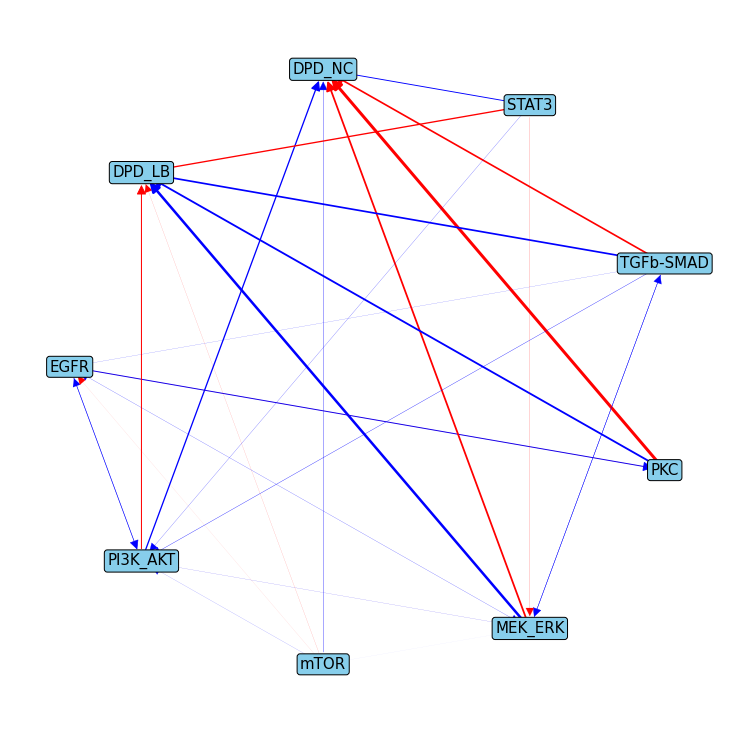

,EGFR,PI3K_AKT,mTOR,MEK_ERK,PKC,TGFb-SMAD,STAT3,DPD_NC,DPD_LB
module,,,,,,,,,
EGFR,0.000000,-0.017296,0.077832,0.097722,0.005981,0.130419,0.000000,0,0
PI3K_AKT,0.267285,0.000000,-0.142067,-0.100213,0.000000,-0.185700,-0.071779,0,0
mTOR,0.000000,0.072774,0.000000,0.127159,0.998085,0.000000,0.000000,0,0
MEK_ERK,0.159401,0.113915,0.027838,0.000000,0.000000,0.140529,-0.076792,0,0
PKC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
TGFb-SMAD,0.329675,0.000000,0.000000,0.390072,0.000000,0.000000,0.000000,0,0
STAT3,0.663795,0.000000,0.000000,0.163367,0.000000,0.000000,0.000000,0,0
DPD_NC,0.000000,-0.001276,-0.399346,-2.913917,-1.542599,-3.738548,-4.022522,0,0
DPD_LB,0.000000,3.106753,-6.179472,11.464020,1.801045,11.848802,8.564069,0,0


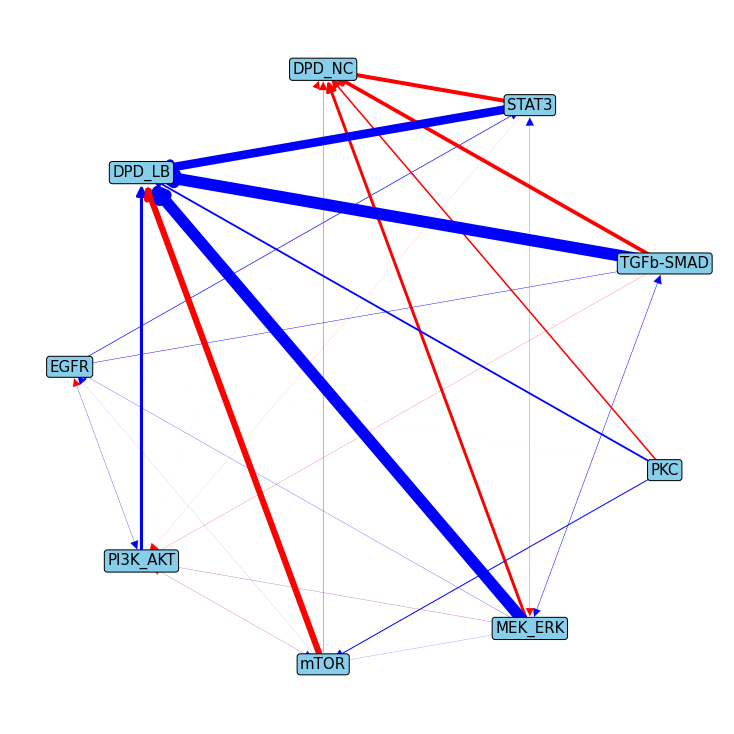

,EGFR,PI3K_AKT,mTOR,MEK_ERK,PKC,TGFb-SMAD,STAT3,DPD_NC,DPD_LB
module,,,,,,,,,
EGFR,0.000000,0.021073,-0.046842,-0.109858,-0.018128,0.122241,0.000000,0,0
PI3K_AKT,-0.114232,0.000000,-0.053754,0.182366,0.000000,0.095497,-0.029373,0,0
mTOR,0.000000,0.217515,0.000000,0.206327,0.770445,0.000000,0.000000,0,0
MEK_ERK,-0.022238,0.118171,-0.038480,0.000000,0.000000,0.307129,-0.015276,0,0
PKC,0.174459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
TGFb-SMAD,1.057047,0.000000,0.000000,0.317782,0.000000,0.000000,0.000000,0,0
STAT3,0.955932,0.000000,0.000000,-0.051813,0.000000,0.000000,0.000000,0,0
DPD_NC,0.000000,-0.719165,0.030664,1.057979,1.343763,-1.596364,1.907052,0,0
DPD_LB,0.000000,2.885846,-0.813325,0.694620,-11.297972,4.812555,-10.204943,0,0


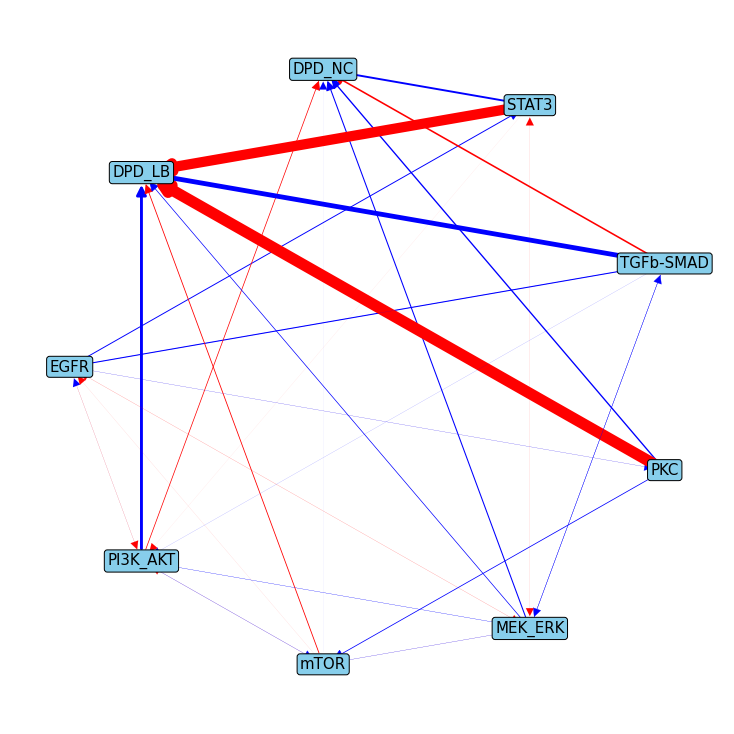

In [603]:
# draw graph based on adjcancy matrix
import networkx as nx
import matplotlib.pyplot as plt
def plot_network(line):
    for t in ["7.0_9.0", "13.0_17.0", "40.0_60.0"]:
        bmra_conn_mean = pd.read_csv(f"results_BMRA/{line}_{t}_Am.csv").round(0)
        bmra_conn_mean["module"] = ["EGFR", "PI3K_AKT", "mTOR", "MEK_ERK", "PKC", "TGFb-SMAD", "STAT3"] + ["DPD_NC", "DPD_LB"]
        bmra_conn_mean = bmra_conn_mean.set_index("module")
        # display(bmra_conn_mean)
        G = nx.from_pandas_adjacency(bmra_conn_mean.T, create_using=nx.DiGraph)
        
        bmra_rij_mean = pd.read_csv(f"results_BMRA/{line}_{t}_rm.csv")
        bmra_rij_mean["module"] = ["EGFR", "PI3K_AKT", "mTOR", "MEK_ERK", "PKC", "TGFb-SMAD", "STAT3"] + ["DPD_NC", "DPD_LB"]
        bmra_rij_mean = bmra_rij_mean.set_index("module")
        display(bmra_rij_mean)
        # plot network graph based on interactions of labels in output_lst
        # display(bmra_conn_mean)
        plt.figure(figsize=(10,10))
        
        for edge in G.edges():
            val = (bmra_rij_mean.loc[edge[1]][edge[0]])
            G[edge[0]][edge[1]]['color'] ="red"
            G[edge[0]][edge[1]]['weight'] = np.abs(val)
        # plot network graph based on interactions of labels in output_lst
        labels = nx.get_edge_attributes(G,'weight')

        weights = [G[u][v]['weight'] for u,v in G.edges()]
        color_lst = (["red" if (bmra_rij_mean.loc[edge[1]][edge[0]]) < 0 else "blue" for edge in G.edges()])
        nx.draw(G, pos=nx.shell_layout(G), with_labels=True,  node_shape="s",  node_color="none", bbox=dict(facecolor="skyblue", boxstyle='round,pad=0.2') , edge_color=color_lst, arrowsize=20, font_size=15, width=weights)
        plt.show()

plot_network("MDAMB157")



In [590]:
# get list of functional connections in adj matrix

module_dict_new = {
    "EGFR": "EGFR",
    "PI3K_AKT": "PI3K",
    "mTOR": "mTOR",
    "MEK_ERK": "MEK",
    "PKC": "PKC",
    "TGFb-SMAD": "SMAD",
    "STAT3": "STAT3",
}


def get_functional_conn_lst(adj_matrix_df):
    functional_conn_lst = {
        "EGFR": [],
        "PI3K": [],
        "mTOR": [],
        "MEK": [],
        "PKC": [],
        "SMAD": [],
        "STAT3": []
    }

    f = open("conn_params.txt", "w+")
    f_func = open("conn_func.txt", "w+")
    f_func_other = open("conn_func_other.txt", "w+")
    for i in range(len(adj_matrix_df)):
        for j in range(len(adj_matrix_df)):
            if(adj_matrix_df.iloc[i][j] ==  1 and i != j and adj_matrix_df.columns[j][:3] != "DPD" and adj_matrix_df.columns[i][:3] != "DPD"):
                prot1 = module_dict_new[adj_matrix_df.columns[j]]
                prot2 = module_dict_new[adj_matrix_df.columns[i]]
                functional_conn_lst[prot2].append(prot1)
                f.write(f"{module_dict_new[adj_matrix_df.columns[j]]}_to_{module_dict_new[adj_matrix_df.columns[i]]} = {module_dict_new[adj_matrix_df.columns[j]]}_to_{module_dict_new[adj_matrix_df.columns[i]]}__FREE\n")
                f.write(f"K_{module_dict_new[adj_matrix_df.columns[j]]}_{module_dict_new[adj_matrix_df.columns[i]]} = K_{module_dict_new[adj_matrix_df.columns[j]]}_{module_dict_new[adj_matrix_df.columns[i]]}__FREE\n")

                f_func.write(f"a_{prot1}_to_{prot2}() = ((1.0 + {prot1}_to_{prot2} * (p{prot1}/K_{prot1}_{prot2})) / (1.0 + p{prot1}/K_{prot1}_{prot2}))\n")
                f_func_other.write(f"{prot1}_{prot2}_fn() = ({prot1}_to_{prot2})\n")
    
    f.close()
    f_func.close()
    f_func_other.close()
    
    return functional_conn_lst


bmra_conn_mean = pd.read_csv(f"results_BMRA/MCF10A_40.0_60.0_Am.csv").round(0)
func_conns = get_functional_conn_lst(bmra_conn_mean)
print(func_conns)
f_conns_rules = open("conn_func_rules.txt", "w+")
for mod_key in func_conns:
    for influence in func_conns[mod_key]:
        f_conns_rules.write(f"a_{influence}_to_{mod_key}() * ")
    f_conns_rules.write("\n")

f_conns_rules.close()

{'EGFR': ['PI3K', 'mTOR', 'MEK', 'PKC', 'SMAD'], 'PI3K': ['EGFR', 'mTOR', 'MEK', 'SMAD', 'STAT3'], 'mTOR': ['PI3K', 'PKC'], 'MEK': ['EGFR', 'PI3K', 'mTOR', 'SMAD', 'STAT3'], 'PKC': ['EGFR'], 'SMAD': [], 'STAT3': ['EGFR']}


In [591]:
# create parameters for config file

lower_bound = 0.001
upper_bound = 10000

bngl_model = open("model/model.bngl", "r")
bngl_conf = open("model/configtemp.txt", "w+")
param_lines = [param_line.strip("\t").strip("\n").split("=")[1] for param_line in bngl_model.readlines() if "__FREE" in param_line]
print(param_lines)
log_vars = ["loguniform_var=" + param + f" {lower_bound} {upper_bound}" for param in param_lines if param != ""]


for i in log_vars:
    bngl_conf.write(i + "\n")
bngl_conf.close()
bngl_model.close()

[' k_egf_f__FREE', ' k_egf_b__FREE', ' k_egf2_f__FREE', ' k_egf2_b__FREE', ' k_dim1_f__FREE', ' k_dim1_b__FREE', ' k_dim2_f__FREE', ' k_dim2_b__FREE', ' k_dim3_f__FREE', ' k_dim3_b__FREE', ' k_r_dim__FREE', '  k_iegfr_f__FREE ', ' k_iegfr_b__FREE', ' k_imek_f__FREE', ' k_imek_b__FREE', ' k_ipi3k_f__FREE', ' k_ipi3k_b__FREE', ' k_ipkc_f__FREE', ' k_ipkc_b__FREE', ' k_imtor_f__FREE', ' k_imtor_b__FREE', ' KM_egfr_phos__FREE', ' KM_egfr_dephos__FREE', ' KM_mek_phos__FREE', ' KM_mek_dephos__FREE', ' KM_pkc_phos__FREE ', ' KM_pkc_dephos__FREE', ' KM_pi3k_phos__FREE  ', ' KM_pi3k_dephos__FREE  ', ' KM_mtor_phos__FREE', ' KM_mtor_dephos__FREE', ' KM_smad_phos__FREE', ' KM_smad_dephos__FREE', ' KM_stat3_phos__FREE', ' KM_stat3_dephos__FREE', ' vnEGFR__FREE  ', ' vpEGFR__FREE ', ' vnMEK__FREE  ', ' vpMEK__FREE ', ' vnPKC__FREE ', ' vpPKC__FREE ', ' vnPI3K__FREE', ' vpPI3K__FREE', ' vnSMAD__FREE', ' vpSMAD__FREE', ' vnSTAT3__FREE', ' vpSTAT3__FREE', ' vpmTOR__FREE', ' vnmTOR__FREE', ' PI3K_to_EG

In [592]:
# file_lst = ["data/MCF10A_iEGFR", "data/MCF10A_iPI3K", "data/MCF10A_imTOR", "data/MCF10A_iMEK", "data/MCF10A_iPKC", "data/MCF10A_iSMAD", "data/MCF10A_iSTAT3"]

In [593]:
#print num cores
# print("Number of cores: ", multiprocessing.cpu_count())

In [594]:
target_lines = ["MDAMB231", "MDAMB157", "MCF10A"]
consensus = {
    "MDAMB231": [],
    "MDAMB157": [],
    "MCF10A": []
}

for tl in target_lines:
    for timestamp in ["7.0_9.0", "13.0_17.0", "40.0_60.0"]:
        bmra_adj_mean = pd.read_csv(f"results_BMRA/{tl}_{timestamp}_Am.csv")
        consensus[tl].append(bmra_adj_mean)

# calculate consensus adj matrix by taking mean of all adj matrices for each cell line
for tl in target_lines:
    consensus[tl] = pd.concat(consensus[tl]).groupby(level=0).mean().round(0)
    consensus[tl].to_csv(f"results_BMRA/consensus_{tl}.csv", index=False)
    # consensus[tl].to_csv(f"consensus_{tl}.csv", index=False)

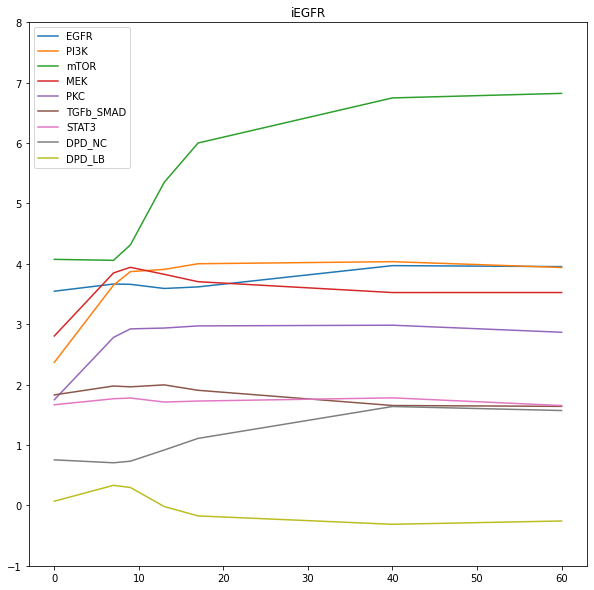

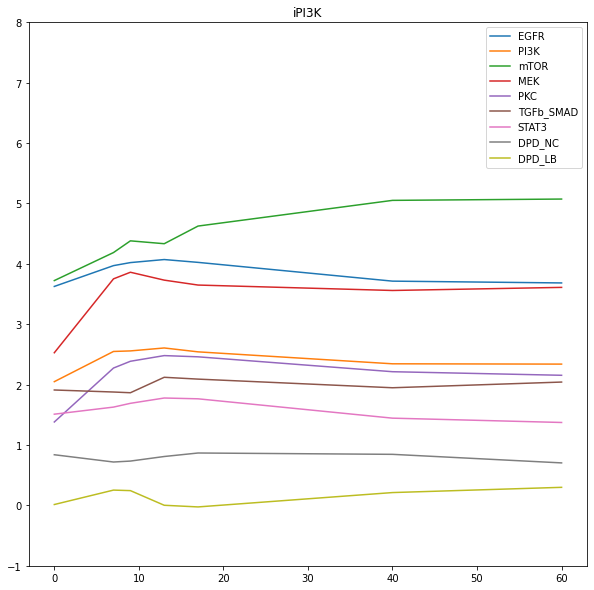

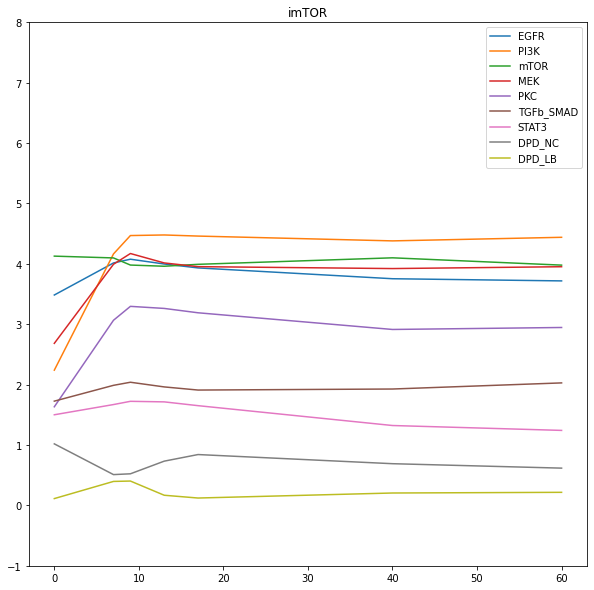

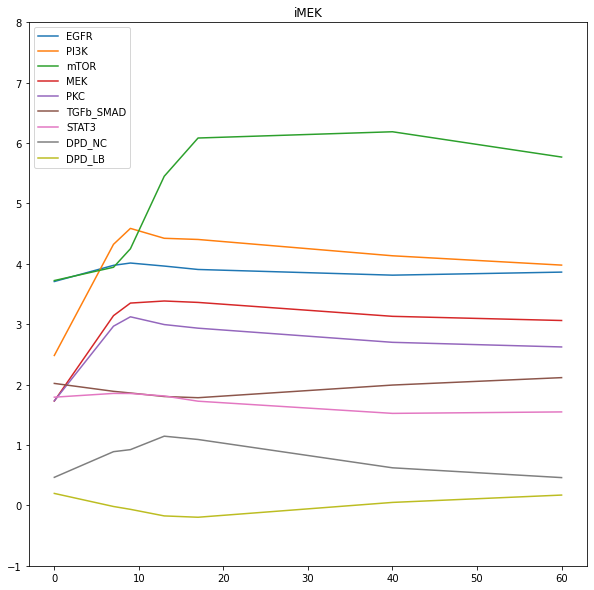

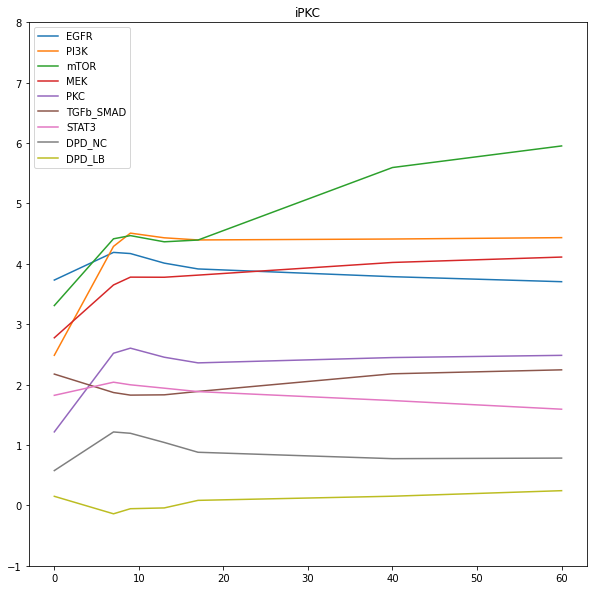

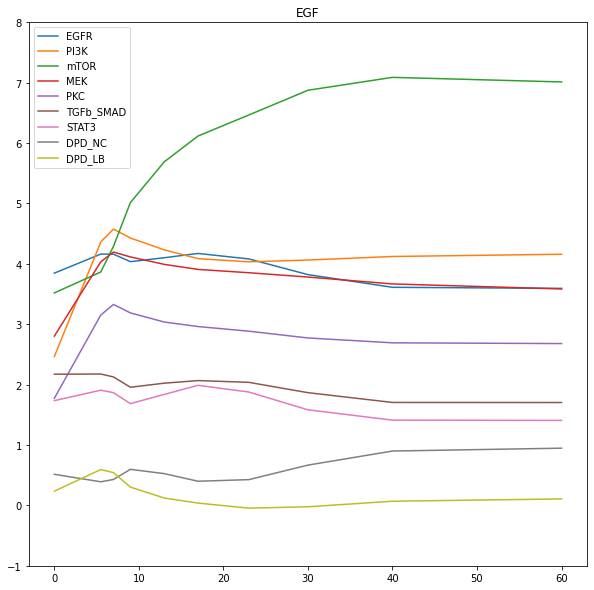

In [629]:
# only keep columns from module_lst

def plot_fold_changes(line):
    df_exp = df_copy.drop(columns=[col for col in df_copy.columns if col not in output_lst+["cell_line", "time", "treatment"]])
    df_exp = df_exp[df_exp.cell_line == line]
    # display(df_exp)
    df_exp_og = df_copy.drop(columns=[col for col in df_copy.columns if col in output_lst])
    df_exp_og = df_exp_og[df_exp_og.cell_line == line]



    df_exp["DPD_LB"] = df_exp.apply(calculate_dpd, args=(df_exp_og.drop(["cell_line", "treatment", "time", "p.AKT.Thr308.", "p.MEK"], axis=1), H_LB_MOD, composite_vec_mod["LB_STV_mod"], composite_vec_mod["Norm_LB_mod"]), axis=1)
    df_exp["DPD_NC"] = df_exp.apply(calculate_dpd, args=(df_exp_og.drop(["cell_line", "treatment", "time", "p.AKT.Thr308.", "p.MEK"],axis=1), H_CANC_MOD, composite_vec_mod["Canc_STV_mod"], composite_vec_mod["Norm_Canc_mod"]), axis=1)

    module_graph_lst = []

    # figure, axis = plt.subplots(5, 5)
    # set figure size to 20x20
    

    for pert in perts_lst+["EGF"]:
        plt.figure(figsize=(10,10))
    
        for module in module_lst:
            try:
                data_fold_df = (df_exp.drop(columns=[col for col in df_exp.columns if col not in [module_dict[module], "cell_line", "time", "treatment"]]))
                data_fold_df = data_fold_df[data_fold_df.treatment == pert]

            except:
                data_fold_df = (df_exp.drop(columns=[col for col in df_exp.columns if col not in [module, "cell_line", "time", "treatment"]]))
                data_fold_df = data_fold_df[data_fold_df.treatment == pert]

            # display(data_fold_df)
            x_vals = data_fold_df.time
            try:
                y_vals = data_fold_df[module_dict[module]]
            except:
                y_vals = data_fold_df[module]
            plt.plot(x_vals, y_vals, label=module)
            plt.legend()
            plt.title(pert)
        plt.ylim([-1,8])
        plt.show()
    

    

plot_fold_changes("MDAMB157")



In [655]:
html = df[[col for col in df.columns[:17]]].head(40).style.background_gradient("inferno").render()
# export high quality image
imgkit.from_string(html, 'styled_dataset.png')

/var/folders/x0/mtqbk1w92ps5s326vkbvv9n40000gn/T/ipykernel_45727/292019288.py:1: FutureWarning:

this method is deprecated in favour of `Styler.to_html()`



Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True